<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:180%;
           font-family:Oswald;
           letter-spacing:0.7px">

<p style= "padding: 5px;
                  color:white;">
    
    
<p style = "text-align:center;"> multi label classification and regression predictions 📊

</p>
</div>

# objective:
- create visualisations show relationships between the target variable and other independent variables
- building models that can accurately predict outcomes of the target variable


# About dataset :
- This is a real estate dataset showing different property-types and their features 




In [29]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly import subplots
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(color_codes=True)
#read data
df = pd.read_csv("Real_Estate_Sales_730_Days.csv")
df.head()

,PropertyID,xrCompositeLandUseID,xrBuildingTypeID,ParcelID,LocationStartNumber,ApartmentUnitNumber,StreetNameAndWay,xrPrimaryNeighborhoodID,LandSF,TotalFinishedArea,...,OwnerLastName,OwnerFirstName,PrimaryGrantor,SaleDate,SalePrice,TotalAppraisedValue,LegalReference,xrSalesValidityID,xrDeedID,AssrLandUse
0,8347,7,16.0,278-816-169,938,0006,WETHERSFIELD AVE,236,NaN,654.00000,...,938 WETHERSFIELD AVE LLC,NaN,BROTHERS IN BLUE LLC,05/03/2022,176000,42100,07951-0127,25,10,CONDOMINIMUM
1,5053,4,11.0,229-649-035,55,NaN,CROWN ST,46,6960.0,2404.80001,...,LUNA,GUILLERMO,CORREA RANDY,08/05/2021,250000,233100,07806-0123,1,10,TWO FAMILY
2,4550,5,12.0,232-768-134,240,NaN,SOUTH ST,41,7500.0,3822.00000,...,ARAUJO,ROGER,PAZ DELIA M,02/07/2022,185000,200400,07905-0091,26,10,THREE FAMILY
3,18326,5,12.0,176-200-189,1045,NaN,ALBANY AVE,179,6700.0,3302.75000,...,BROOKS,CATHY,1047 ALBANY AVE LLC,05/12/2021,320000,49700,07764-0144,27,10,THREE FAMILY
4,6121,5,12.0,231-673-225,154,NaN,CAMPFIELD AVE,43,6150.0,3759.00000,...,ARTHUR,PETER,ARTHUR PETER L,12/17/2021,1,311300,07879-0115,5,8,THREE FAMILY


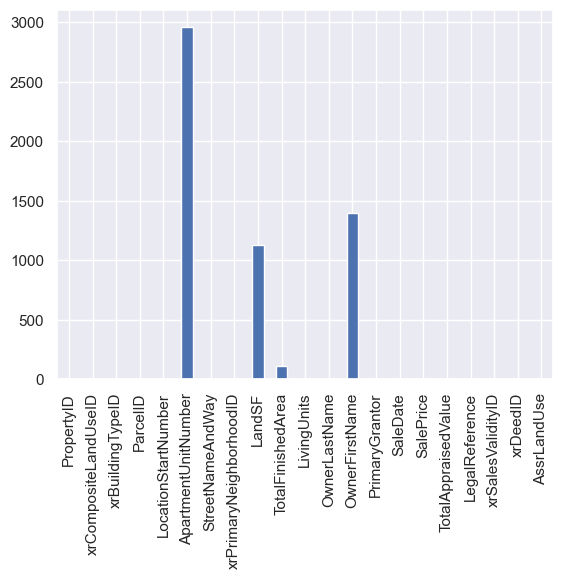

In [30]:
# plot null values 
df.isna().sum().plot(kind="bar")
plt.show()

In [31]:
# fill up missing values with mode function
df["LandSF"]= df["LandSF"].fillna(df["LandSF"].mode()[0])
df["OwnerFirstName"]= df["OwnerFirstName"].fillna(df["OwnerFirstName"].mode()[0])
df["TotalFinishedArea"]= df["TotalFinishedArea"].fillna(df["TotalFinishedArea"].mode()[0])
df["LivingUnits"]= df["LivingUnits"].fillna(df["LivingUnits"].mode(),)
df["xrCompositeLandUseID"]= df["xrCompositeLandUseID"].fillna(df["xrCompositeLandUseID"].mode()[0])

In [32]:
#view columns
df.columns

Index(['PropertyID', 'xrCompositeLandUseID', 'xrBuildingTypeID', 'ParcelID',
       'LocationStartNumber', 'ApartmentUnitNumber', 'StreetNameAndWay',
       'xrPrimaryNeighborhoodID', 'LandSF', 'TotalFinishedArea', 'LivingUnits',
       'OwnerLastName', 'OwnerFirstName', 'PrimaryGrantor', 'SaleDate',
       'SalePrice', 'TotalAppraisedValue', 'LegalReference',
       'xrSalesValidityID', 'xrDeedID', 'AssrLandUse'],
      dtype='object')

In [33]:
#view head
df.head(1)

,PropertyID,xrCompositeLandUseID,xrBuildingTypeID,ParcelID,LocationStartNumber,ApartmentUnitNumber,StreetNameAndWay,xrPrimaryNeighborhoodID,LandSF,TotalFinishedArea,...,OwnerLastName,OwnerFirstName,PrimaryGrantor,SaleDate,SalePrice,TotalAppraisedValue,LegalReference,xrSalesValidityID,xrDeedID,AssrLandUse
0,8347,7,16.0,278-816-169,938,0006,WETHERSFIELD AVE,236,7500.0,654.0,...,938 WETHERSFIELD AVE LLC,JOSE,BROTHERS IN BLUE LLC,05/03/2022,176000,42100,07951-0127,25,10,CONDOMINIMUM


In [34]:
# drop unnecessary data
df.drop(["PropertyID","ParcelID",
       "xrPrimaryNeighborhoodID",
        "LegalReference","ApartmentUnitNumber","LocationStartNumber" ,"SaleDate"],axis=1, inplace = True)

In [35]:
#values counts of target variable
df["AssrLandUse"].value_counts()

ONE FAMILY      1292
CONDOMINIMUM    1020
THREE FAMILY     900
TWO FAMILY       712
CONDO GARAGE     112
APT FOUR          44
MULTI DWLG         5
APT CRDA           3
Name: AssrLandUse, dtype: int64

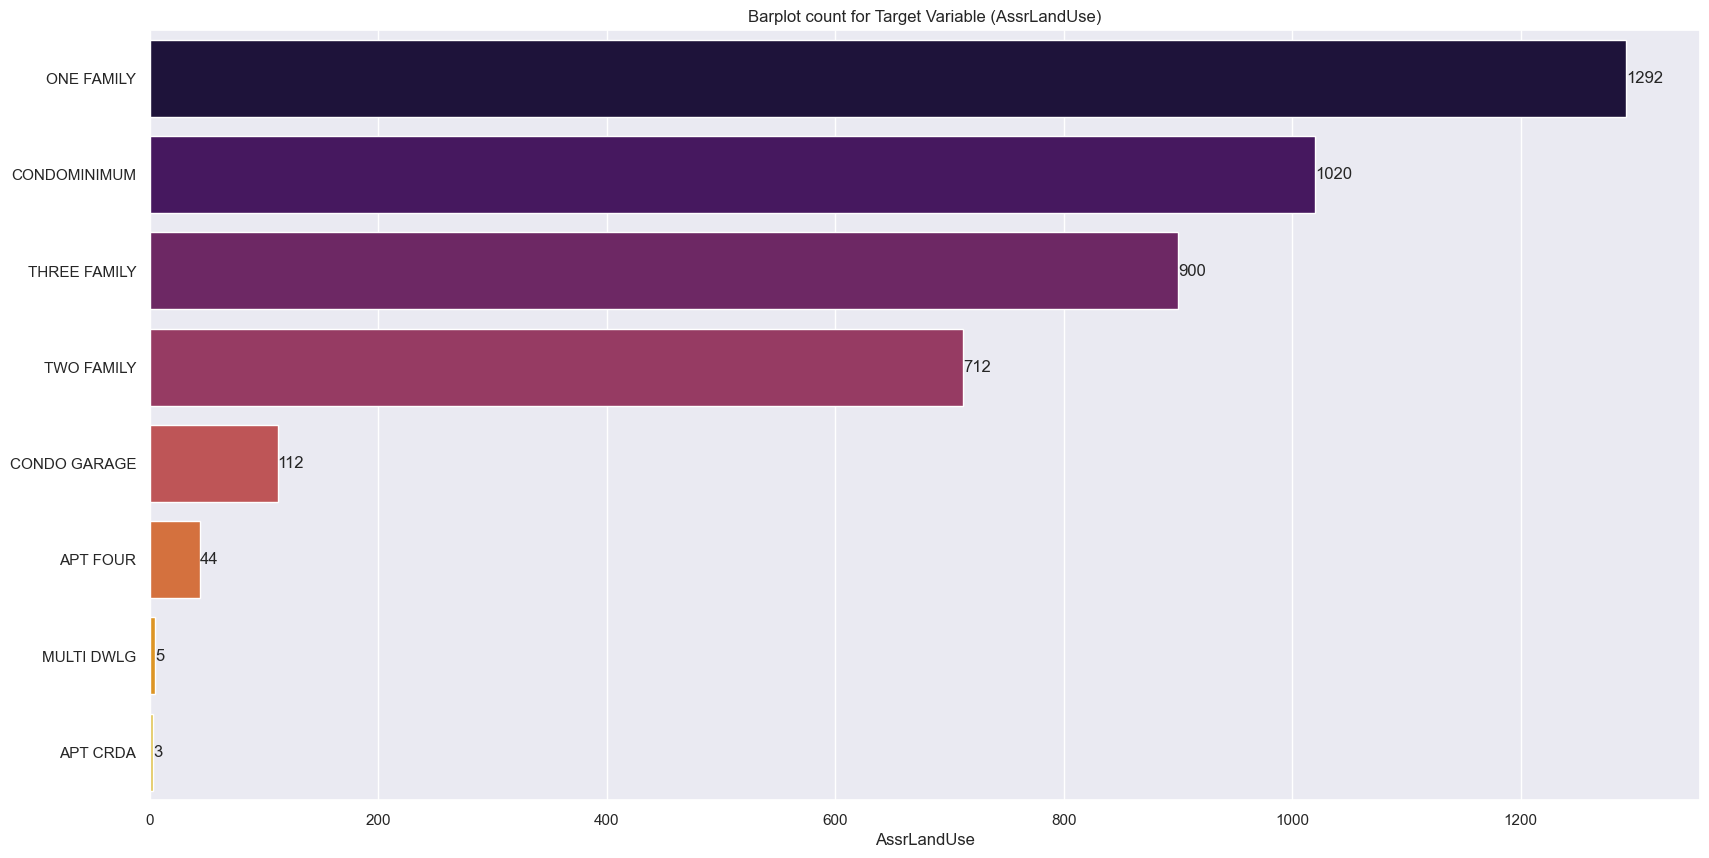

In [36]:
# plot Target variable 
df1 = df["AssrLandUse"].value_counts().to_frame()
plt.figure(figsize =(20,10))
ax = sns.barplot(x = df1["AssrLandUse"], y = df1.index,   palette = "inferno")
ax.bar_label(ax.containers[0],fmt="%.0f",label_type="edge")
ax.set_title("Barplot count for Target Variable (AssrLandUse)")
plt.show()

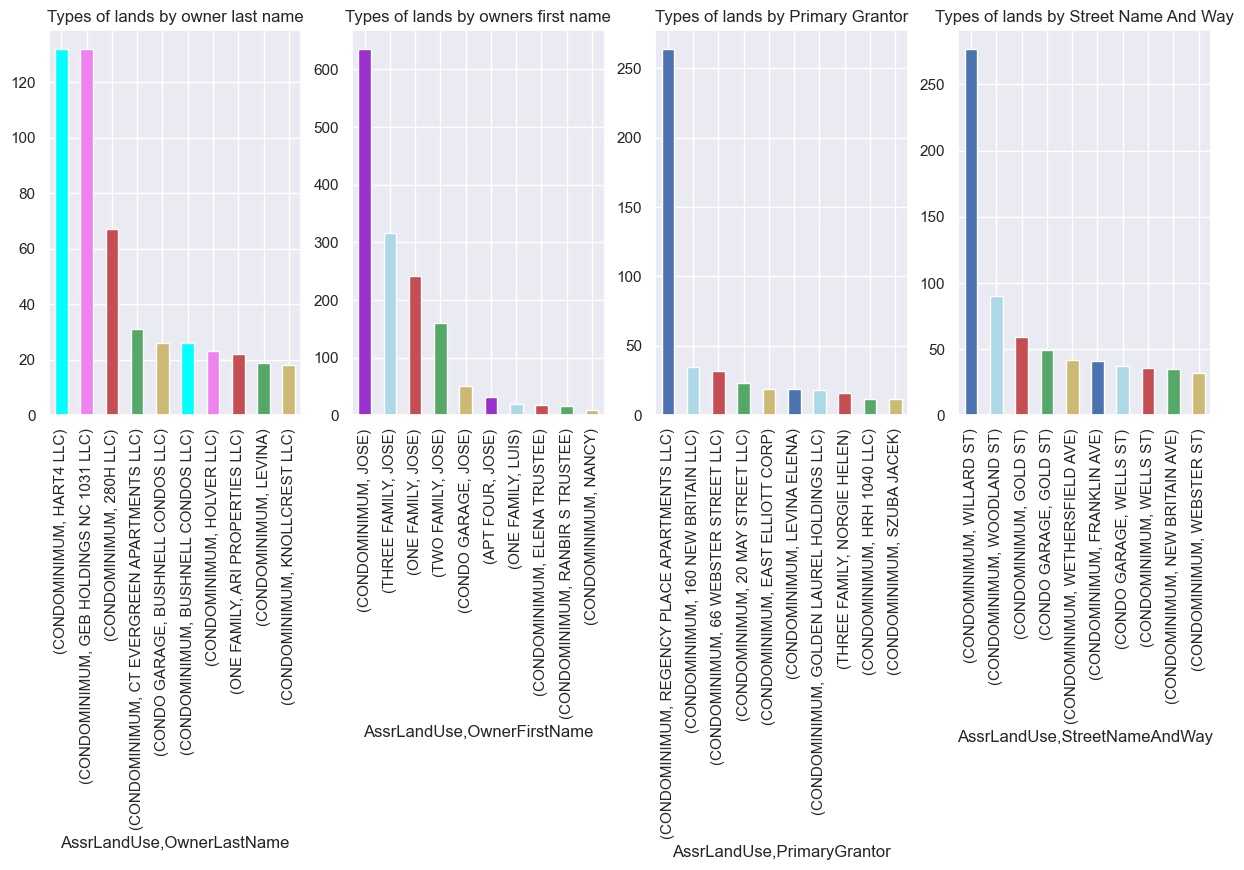

In [37]:
# explore relationships between target variable and categorical variables
f,ax = plt.subplots (1,4, figsize = (15 ,5))


df.groupby(["AssrLandUse"])["OwnerLastName"].value_counts().sort_values(ascending=False)[:10].plot(ax = ax [0], kind= "bar" ,color = ["cyan","violet","r", "g","y" ])
ax[0].set_title("Types of lands by owner last name")
df.groupby(["AssrLandUse"])["OwnerFirstName"].value_counts().sort_values(ascending=False)[:10].plot(ax = ax [1], kind= "bar" ,color = ["darkorchid","lightblue","r" ,"g" ,"y"])
ax[1].set_title("Types of lands by owners first name")
df.groupby(["AssrLandUse"])["PrimaryGrantor"].value_counts().sort_values(ascending=False)[:10].plot(ax = ax [2], kind = "bar",color = ["b","lightblue","r", "g","y" ])
ax[2].set_title("Types of lands by Primary Grantor")
df.groupby(["AssrLandUse"])["StreetNameAndWay"].value_counts().sort_values(ascending=False)[:10].plot(ax = ax [3],kind = "bar",color =["b","lightblue","r" ,"g" ,"y"])
ax[3].set_title("Types of lands by Street Name And Way")
plt.show ()

In [38]:
df.head(1)

,xrCompositeLandUseID,xrBuildingTypeID,StreetNameAndWay,LandSF,TotalFinishedArea,LivingUnits,OwnerLastName,OwnerFirstName,PrimaryGrantor,SalePrice,TotalAppraisedValue,xrSalesValidityID,xrDeedID,AssrLandUse
0,7,16.0,WETHERSFIELD AVE,7500.0,654.0,1.0,938 WETHERSFIELD AVE LLC,JOSE,BROTHERS IN BLUE LLC,176000,42100,25,10,CONDOMINIMUM


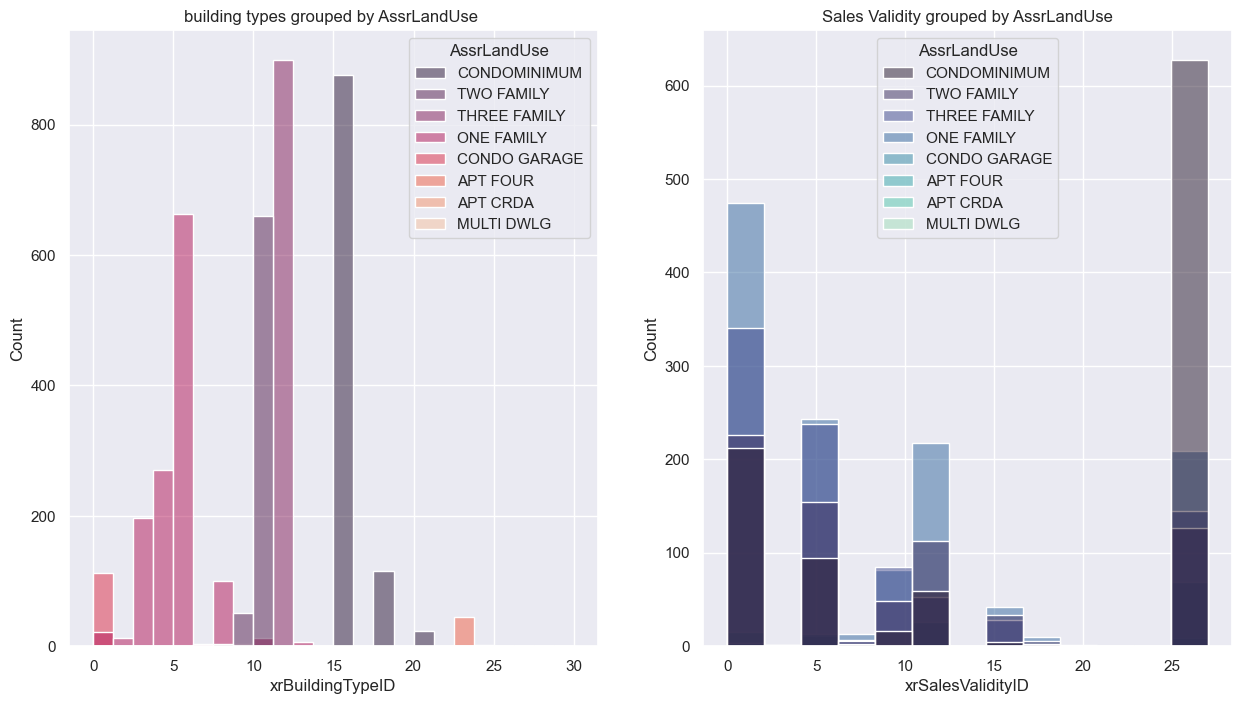

In [39]:
# explore relationships target variable with numerical variable
fig,axs = plt.subplots (nrows=1, ncols=2, sharey=False ,figsize= (15,8))
ax= sns.histplot(x="xrBuildingTypeID",hue="AssrLandUse",data = df,ax=axs[0] ,palette="rocket")
ax.set_title("building types grouped by AssrLandUse ")
ax= sns.histplot(x="xrSalesValidityID",hue="AssrLandUse",data = df,ax=axs[1] ,palette="mako")
ax.set_title("Sales Validity grouped by AssrLandUse")
plt.show()

In [40]:
#drop target variables
df.drop(["xrCompositeLandUseID","xrBuildingTypeID",
       "LandSF",
        "xrSalesValidityID","LivingUnits","xrDeedID"],axis=1, inplace = True)

- lets make a dataset ready for regression predictions

In [41]:
#prepare new df
df_sales= df.copy()

In [42]:
df.head(1)

,StreetNameAndWay,TotalFinishedArea,OwnerLastName,OwnerFirstName,PrimaryGrantor,SalePrice,TotalAppraisedValue,AssrLandUse
0,WETHERSFIELD AVE,654.0,938 WETHERSFIELD AVE LLC,JOSE,BROTHERS IN BLUE LLC,176000,42100,CONDOMINIMUM


In [43]:
# get statistics of data
df.describe()

,TotalFinishedArea,SalePrice,TotalAppraisedValue
count,4088.000000,4.088000e+03,4.088000e+03
mean,2240.479484,1.283308e+06,1.920930e+05
std,6583.352334,5.437901e+06,5.101605e+05
min,371.000000,0.000000e+00,0.000000e+00
25%,974.050007,0.000000e+00,8.610000e+04
50%,1722.000000,1.260000e+05,1.830000e+05
75%,3198.375000,2.620000e+05,2.444000e+05
max,293441.000000,6.050000e+07,2.264010e+07


In [44]:
# get quartiles
df.describe(percentiles=[.3,.6,.9]).T

,count,mean,std,min,30%,50%,60%,90%,max
TotalFinishedArea,4088.0,2.240479e+03,6.583352e+03,371.0,1104.0,1722.0,2352.0,3804.0,293441.0
SalePrice,4088.0,1.283308e+06,5.437901e+06,0.0,1.0,126000.0,187000.0,1322640.0,60500000.0
TotalAppraisedValue,4088.0,1.920930e+05,5.101605e+05,0.0,123510.0,183000.0,206940.0,288430.0,22640100.0


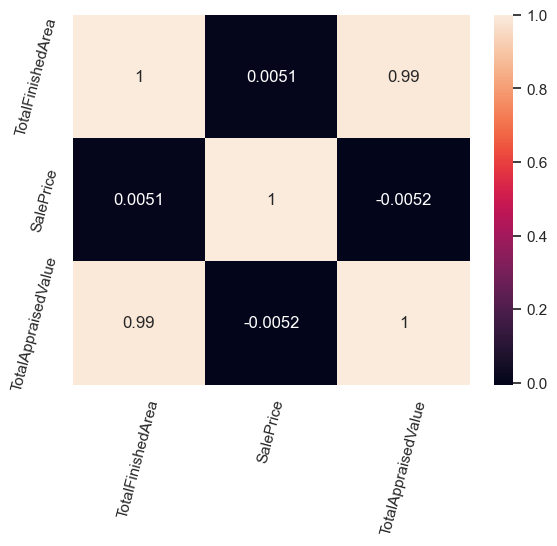

In [45]:
# plot data
sns.heatmap(df.corr(),fmt=".2g", annot= True)
plt.xticks(rotation=75)
plt.yticks(rotation=75)
plt.show()

# Getting your Target variable 

In [46]:
# get your target variable ready for predictions
Features = df.drop(["AssrLandUse"],axis = 1 )
y= df["AssrLandUse"]

# importing required libraries multi class classification modelling

In [47]:
# target variable value_counts
y.value_counts()

ONE FAMILY      1292
CONDOMINIMUM    1020
THREE FAMILY     900
TWO FAMILY       712
CONDO GARAGE     112
APT FOUR          44
MULTI DWLG         5
APT CRDA           3
Name: AssrLandUse, dtype: int64

In [48]:
import nltk
from nltk.tokenize import sent_tokenize ,word_tokenize
from sklearn.preprocessing import MultiLabelBinarizer
#nltk.download('punkt')
from sklearn.pipeline import Pipeline
from sklearn .multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn .model_selection import train_test_split


from sklearn .metrics import classification_report
from sklearn import metrics
from sklearn.metrics import precision_score , recall_score, accuracy_score




# applying the tokenizer to makesure the y variable come out in words not in letters

In [49]:
df.head(1)

,StreetNameAndWay,TotalFinishedArea,OwnerLastName,OwnerFirstName,PrimaryGrantor,SalePrice,TotalAppraisedValue,AssrLandUse
0,WETHERSFIELD AVE,654.0,938 WETHERSFIELD AVE LLC,JOSE,BROTHERS IN BLUE LLC,176000,42100,CONDOMINIMUM


In [50]:
y=df["AssrLandUse"] = df["AssrLandUse"].apply(word_tokenize)

# Transforming the y variable label to  binary

In [51]:

# transform target variable to binary
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(y)
print(y)


[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


# getting the Target classes 

In [52]:
# get classes
mlb.classes_

array(['APT', 'CONDO', 'CONDOMINIMUM', 'CRDA', 'DWLG', 'FAMILY', 'FOUR',
       'GARAGE', 'MULTI', 'ONE', 'THREE', 'TWO'], dtype=object)

# getting dummy variables

In [53]:
# convert categorical features to dummies 
X = pd.get_dummies(Features, columns =["StreetNameAndWay","OwnerLastName","OwnerFirstName","PrimaryGrantor"])


# train the data

In [54]:
# split the data
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 53)

# logistic Model with a multilabel classifier

In [55]:
# begin  modelprediction
log =LogisticRegression(random_state=23, max_iter=1000)
clf=MultiOutputClassifier(log,n_jobs =2)
# fit the model
y_pred= clf.fit(X_train,y_train).predict(X_test)
#get scores
score = metrics.f1_score(y_test, 
                         y_pred, 
                         average="macro", 
                         zero_division=0)



print(metrics.classification_report(y_test, 
                                    y_pred, 
                                    digits=3, 
                                    zero_division=0))



              precision    recall  f1-score   support

           0      0.000     0.000     0.000        15
           1      1.000     0.286     0.444        35
           2      0.984     0.380     0.548       321
           3      0.000     0.000     0.000         1
           4      0.000     0.000     0.000         0
           5      0.787     0.998     0.880       856
           6      0.000     0.000     0.000        14
           7      1.000     0.286     0.444        35
           8      0.000     0.000     0.000         0
           9      0.771     0.723     0.746       372
          10      0.490     0.545     0.516       268
          11      0.000     0.000     0.000       216

   micro avg      0.750     0.662     0.703      2133
   macro avg      0.419     0.268     0.298      2133
weighted avg      0.693     0.662     0.645      2133
 samples avg      0.767     0.625     0.671      2133



# View Multilabel(predictive) model in Table

In [56]:
# Retreive the text labels from the MultiLabelBinarizer
pred_labels = mlb.inverse_transform(y_pred)
# Append them to the DataFrame
X_test["Predicted Labels"] = pred_labels
df_mo=X_test
df_mo.sample(10, random_state=24)

,TotalFinishedArea,SalePrice,TotalAppraisedValue,StreetNameAndWay_ACTON ST,StreetNameAndWay_ADAMS ST,StreetNameAndWay_ADDISON ST,StreetNameAndWay_ADELAIDE ST,StreetNameAndWay_AFFLECK ST,StreetNameAndWay_ALBANY AVE,StreetNameAndWay_ALDEN ST,...,PrimaryGrantor_ZARRILLI LUCIA,PrimaryGrantor_ZEINER PAULA A,PrimaryGrantor_ZHAO YAN,PrimaryGrantor_ZIEGLER AMANDA,PrimaryGrantor_ZIMMERMAN ERICH,PrimaryGrantor_ZIMMITTI GIUSEPPA,PrimaryGrantor_ZUBAIR ADEBISI,PrimaryGrantor_ZUBAIR ADEBISI T,PrimaryGrantor_ZUBAIR ADEBISI T.,Predicted Labels
1887,1663.000,157000,169500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"(FAMILY,)"
1903,652.000,2652000,37800,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"(CONDOMINIMUM,)"
1299,2937.500,1,240800,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,"(FAMILY,)"
2015,3007.200,0,281700,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"(FAMILY,)"
384,3500.750,0,281500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"(FAMILY,)"
1860,1405.000,0,168700,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"(FAMILY, ONE)"
139,2988.750,0,204800,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"(FAMILY, THREE)"
3172,4212.000,270000,270700,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"(FAMILY, THREE)"
16,3696.000,170000,260400,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"(FAMILY, THREE)"
329,3401.375,285000,272100,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"(FAMILY,)"


In [57]:
# view multilabels predictive table_labels

In [58]:
# view multilabels predictive table_labels excluding categorical columns 
df_mo[["TotalFinishedArea" ,"SalePrice" ,"TotalAppraisedValue" ,"Predicted Labels"]]

,TotalFinishedArea,SalePrice,TotalAppraisedValue,Predicted Labels
2335,640.00000,10250144,51800,"(CONDOMINIMUM,)"
3632,670.00000,10250144,54100,"(CONDOMINIMUM,)"
2229,2649.50000,0,142100,"(FAMILY, THREE)"
384,3500.75000,0,281500,"(FAMILY,)"
165,610.00000,59269640,32300,"(CONDOMINIMUM,)"
...,...,...,...,...
3383,3900.00000,265000,309400,"(FAMILY,)"
4066,2132.00001,332000,296100,"(FAMILY, ONE)"
758,2304.00001,237000,216800,"(FAMILY,)"
1961,3801.00000,330000,242000,"(FAMILY, THREE)"


# Regression model predictions

In [59]:
#getting data for regression
df_sales= df_sales.copy()


In [60]:
# get your target variable
Features = df_sales.drop(["SalePrice"],axis = 1 )
y= df["SalePrice"]

In [61]:
# get dummy variable
X = pd.get_dummies(Features, columns =["StreetNameAndWay","OwnerLastName","OwnerFirstName","PrimaryGrantor" ,"AssrLandUse"])

In [62]:
#split data
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

# Logistic Regression Model

In [63]:
# import required libraries for building models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_percentage_error
import math
from sklearn import metrics
model=LinearRegression()
# fit the model
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
# get metric scores
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print("MAE is {}".format(mae) )
print("MAPE is {}".format(mape) )
print("MSE is {}".format(mse) )
print("R2 score is {}".format(r2))
print("RMSE score is {}".format(rmse))

MAE is 141071.39306543526
MAPE is 2.1987976658734078e+20
MSE is 104186976232.97617
R2 score is 0.9956965583021354
RMSE score is 322780.07409531367


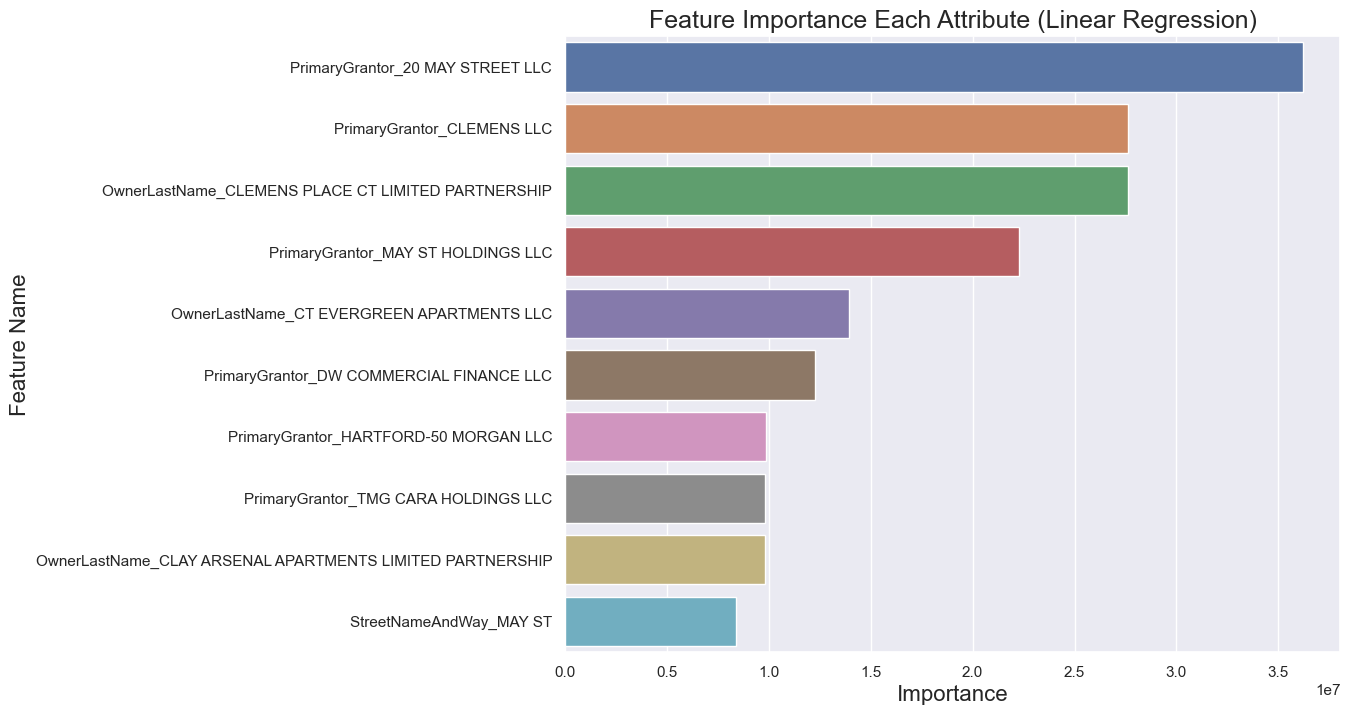

In [64]:
imp_df = pd.DataFrame({
"Feature Name": X_train.columns,
"Importance": np.abs(model.coef_)

})

# Sort by importance (absolute value of coefficients)
fi = imp_df.sort_values(by="Importance", ascending=False)

# Select the top 10 features

fi2 = fi.head(10)

# Plot the feature importance

plt.figure(figsize=(10, 8))

sns.barplot(data=fi2, x="Importance", y="Feature Name")

plt.title("Feature Importance Each Attribute (Linear Regression)", fontsize=18)
plt.xlabel("Importance", fontsize=16)

plt.ylabel("Feature Name", fontsize=16)

plt.show()

# Decision Tree Regression

In [65]:
# import required libraries
from sklearn.tree import DecisionTreeRegressor
# get estmators
dtree = DecisionTreeRegressor(random_state=0, max_depth=None, max_features='auto', min_samples_leaf=1, min_samples_split=2)
dtree.fit(X_train, y_train)


DecisionTreeRegressor(max_features='auto', random_state=0)

In [66]:
DecisionTreeRegressor(max_features='auto', random_state=0)
from sklearn import metrics
import math

y_pred = dtree.predict(X_test)
#get scores
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

rmse = math.sqrt(mse)



print("MAE is {}".format(mae))
print("MSE is {}".format(mse) )
print("R2 score is {}".format(r2))
print("RMSE score is {}".format(rmse) )


MAE is 88261.93846780766
MSE is 20270434753.907703
R2 score is 0.9991627299562016
RMSE score is 142374.27700925368


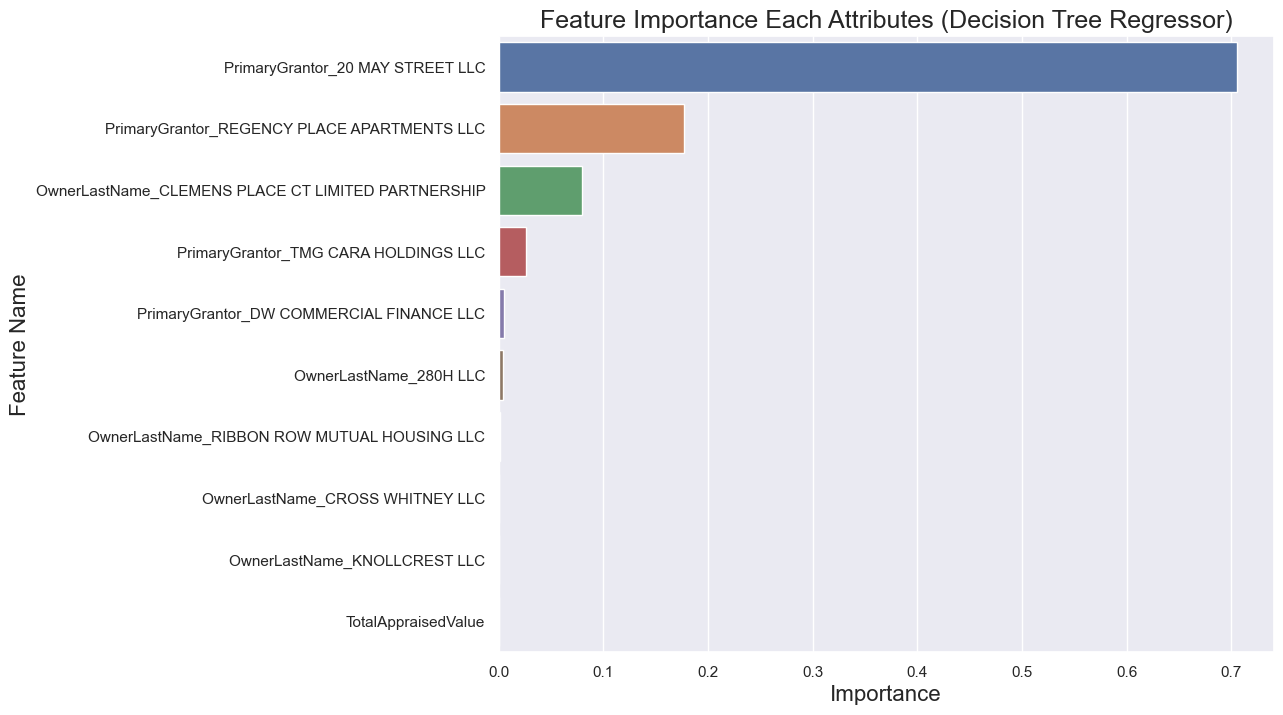

In [67]:
# plot model
imp_df = pd.DataFrame({
"Feature Name": X_train.columns,
"Importance": dtree.feature_importances_

})

fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))

sns.barplot(data=fi2, x="Importance", y="Feature Name")

plt.title("Feature Importance Each Attributes (Decision Tree Regressor)", fontsize=18)
plt.xlabel ("Importance", fontsize=16)

plt.ylabel ("Feature Name", fontsize=16)

plt.show()

# Random Forest Regression

In [68]:
# import required libraries
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0, max_depth=None, min_samples_split=2, n_estimators= 100)
#fit model
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

In [69]:
# import required libraries
from sklearn import metrics

from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = rf.predict(X_test)
# get metric score
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print("MAE is {}".format(mae) )
print("MAPE is {}".format(mape) )
print("MSE is {}".format(mse) )
print("R2 score is {}".format(r2))
print("RMSE score is {}".format(rmse))


MAE is 94683.93599068577
MAPE is 1.209087419090642e+20
MSE is 119241587779.63048
R2 score is 0.9950747277680564
RMSE score is 345313.75266506616


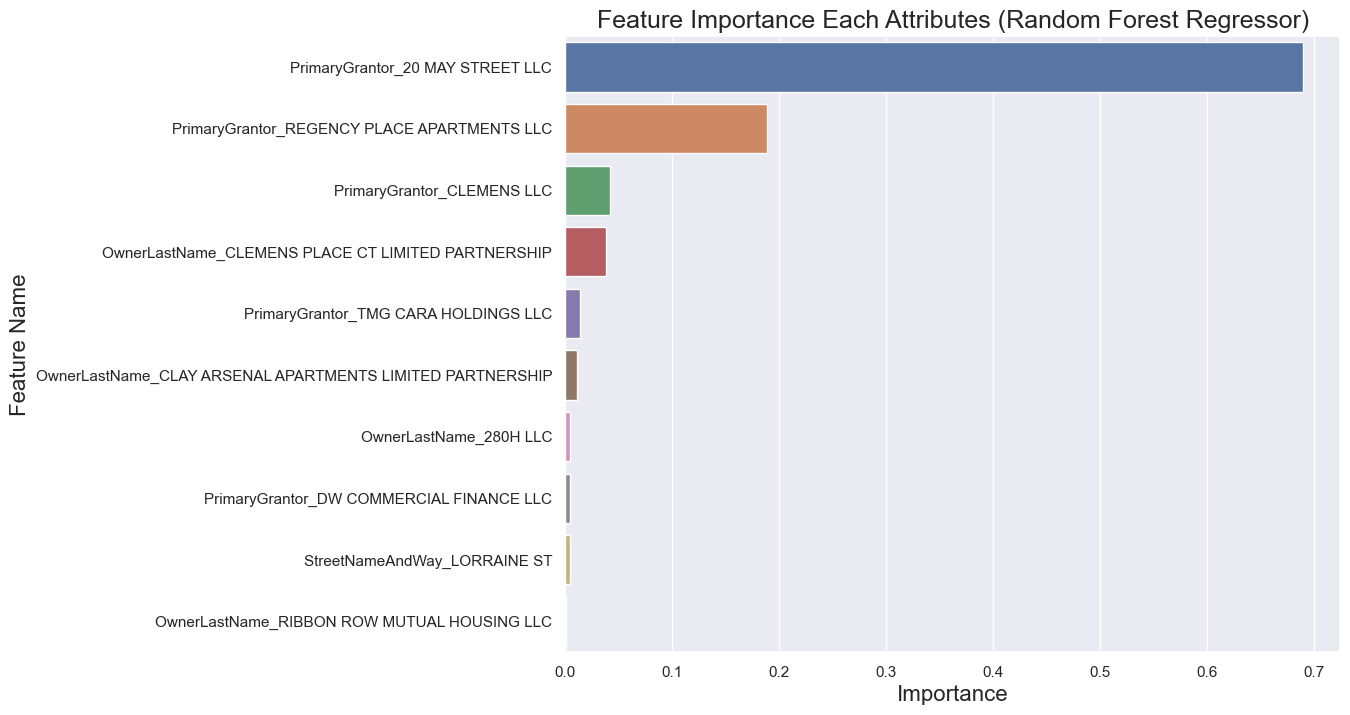

In [70]:
#plot model
imp_df = pd.DataFrame({
"Feature Name": X_train.columns,
"Importance": rf.feature_importances_

})

fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))

sns.barplot(data=fi2, x="Importance", y="Feature Name")

plt.title("Feature Importance Each Attributes (Random Forest Regressor)", fontsize=18)
plt.xlabel ("Importance", fontsize=16)

plt.ylabel ("Feature Name", fontsize=16)

plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:180%;
           font-family:Oswald;
           letter-spacing:0.7px">

<p style= "padding: 5px;
                  color:white;">
    
    
<p style = "text-align:center;"> END oF multi label classification and regression prediction📊
    </p>
</div>
    